# Diabetes Prediction using different models  

### Knowing the dataset

Attribute information
- 8 predictor variables
    - Pregnancies:  Number of times pregnant
    - Glucose:  Plasma glucose concentration a 2 hours in an oral glucose  tolerance test
    - BloodPressure:  Diastolic blood pressure (mm Hg)
    - SkinThickness:  Triceps skin fold thickness (mm)
    - Insulin:  2-Hour serum insulin (mu U/ml)
    - BMI:  Body mass index (weight in kg/(height in m)^2)
    - DiabetesPedigreeFunction:  Diabetes pedigree function
    - Age:  Age (years)
- 1 target variable
    - Outcome: Risk of developing diabetes - 1, No diabetes - 0



### Loading libraries and dataset
performing pre-modeling task, modeling and comparison

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
%matplotlib inline

# performing pre-modeling tasks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve


In [2]:
diatse = pd.read_csv('diabetes.csv')
diatse.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Total shape of the dataset(Rows and columns)

In [3]:
diatse.shape

(768, 9)

In [4]:
diatse.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outcome

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

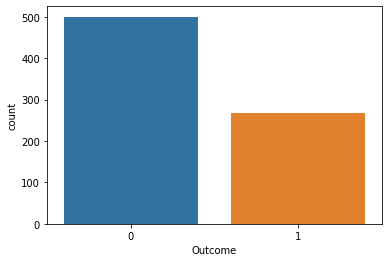

In [5]:
diatse.Outcome.value_counts()
print(diatse.Outcome.value_counts())
sn.countplot(x = 'Outcome', data = diatse)

As we can see we have 500 patients with no diabetes and 268 with diabetes

Removing missing values

In [6]:
diatse.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diatse.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Duplicate values

In [8]:
diatse=diatse.drop_duplicates()

No. of zero values in dataset

In [9]:
count = (diatse['Pregnancies'] == 0).sum()
print('No. of zero values in column pregnancies: ', count)
count = (diatse['Glucose'] == 0).sum()
print('No. of zero values in column Glucose: ', count)
count = (diatse['BloodPressure'] == 0).sum()
print('No. of zero values in column BloodPressure: ', count)
count = (diatse['SkinThickness'] == 0).sum()
print('No. of zero values in column SkinThickness: ', count)
count = (diatse['Insulin'] == 0).sum()
print('No. of zero values in column Insulin: ', count)
count = (diatse['BMI'] == 0).sum()
print('No. of zero values in column BMI: ', count)
count = (diatse['DiabetesPedigreeFunction'] == 0).sum()
print('No. of zero values in column DiabetesPedigreeFunction: ', count)
count = (diatse['Age'] == 0).sum()
print('No. of zero values in column Age ', count)


No. of zero values in column pregnancies:  111
No. of zero values in column Glucose:  5
No. of zero values in column BloodPressure:  35
No. of zero values in column SkinThickness:  227
No. of zero values in column Insulin:  374
No. of zero values in column BMI:  11
No. of zero values in column DiabetesPedigreeFunction:  0
No. of zero values in column Age  0


Replacing zero values with mean of the column

In [10]:
diatse['Glucose']=diatse['Glucose'].replace(0,diatse['Glucose'].mean())
diatse['Pregnancies']=diatse['Pregnancies'].replace(0,diatse['Pregnancies'].mean())
diatse['BloodPressure']=diatse['BloodPressure'].replace(0,diatse['BloodPressure'].mean())
diatse['SkinThickness']=diatse['SkinThickness'].replace(0,diatse['SkinThickness'].mean())
diatse['Insulin']=diatse['Insulin'].replace(0,diatse['Insulin'].mean())
diatse['BMI']=diatse['BMI'].replace(0,diatse['BMI'].mean())

Now we have cleaned the data, all the duplicate, missing and zero values are taken care of


## Exploratory Data Analysis

In [11]:
diatse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 60.0 KB


In [12]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(diatse.groupby('Outcome').mean()[var])

In [13]:
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(diatse[col_name][diatse.Outcome == 1], color ="red", rug = True)
    sns.distplot(diatse[col_name][diatse.Outcome == 0], color ="lightgreen",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

Pregnancies

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

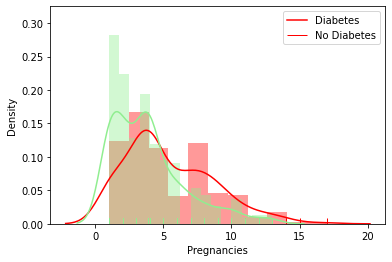

In [14]:
distplot('Pregnancies')

In [15]:
mean_target('Pregnancies')

,Pregnancies
Outcome,
0,3.859378
1,5.410866


As we can see, the risk of diabetes increases with number of pregnancies

 Glucose

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

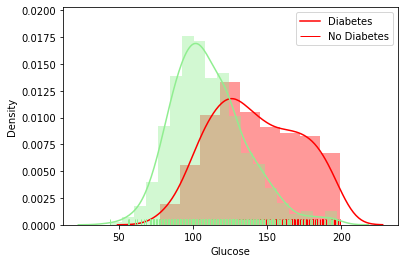

In [16]:
distplot('Glucose')

In [17]:
mean_target('Glucose')

,Glucose
Outcome,
0,110.705367
1,142.159661


We can see that increase in level of glucose can be a factor contributing to diabetes

BloodPressure

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

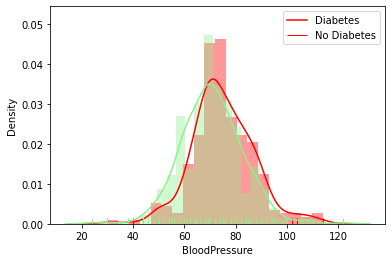

In [18]:
distplot('BloodPressure')

In [19]:
mean_target('BloodPressure')

,BloodPressure
Outcome,
0,70.810008
1,74.950326


Increase in blood pressure can be a factor in developing diabetes

Insulin

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

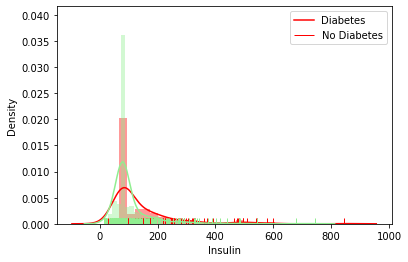

In [20]:
distplot('Insulin')

In [21]:
mean_target('Insulin')

,Insulin
Outcome,
0,106.457354
1,141.426597


Level of Insulin is greater in diabetes patients than the one with non-diabetic.


**FACT**: The diabetes dataset here is type II diabetes, where insulin receptors are blocked because of which even if insulin is produced it remains in bloodstream therefore level of insulin is high.

BMI

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

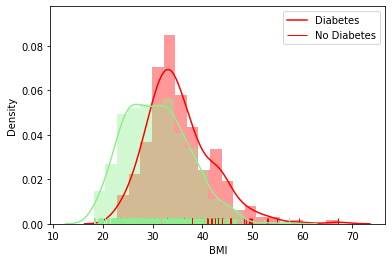

In [22]:
distplot('BMI')

In [23]:
mean_target('BMI')

,BMI
Outcome,
0,30.880066
1,35.381288


Now lets find out how Age plays role in developing Type II diabetes

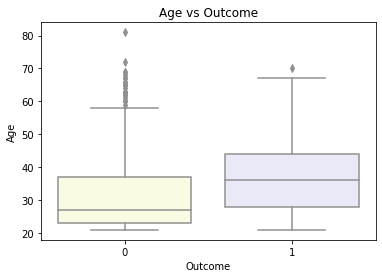

In [24]:
risko = {0: "lightyellow", 1: "lavender"}
sns.boxplot(x = 'Outcome', y = 'Age', data = diatse, palette = risko)
plt.title('Age vs Outcome')
plt.show()

According to the boxplot, the median for Diabetes patients is higher than Non-Diabetic thus as the age increases chances of developing Type II Diabetes increases

Now lets check having Diabetic family history affects  the risk for developing Diabetes

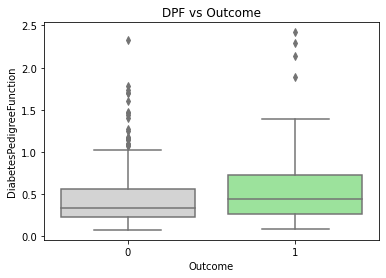

In [25]:
risko = {0: "lightgrey", 1: "lightgreen"}
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = diatse, palette = risko)
plt.title('DPF vs Outcome')
plt.show()

According to boxplot, Many of the people have high DPF but not everyone has diabetes. But people with median range close to 0.5 have chances of developing diabetes

Relation between level of Glucose and Outcome

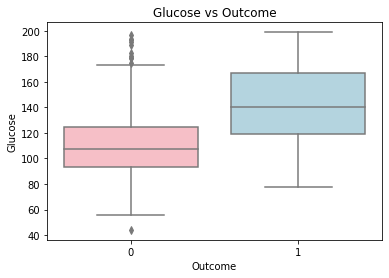

In [26]:
risko = {0: "lightpink", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = diatse, palette = risko)
plt.title('Glucose vs Outcome')
plt.show()

With high level of Glucose, there is higher risk of developing Diabetes.

Now lets see how Insulin and Glucose are related

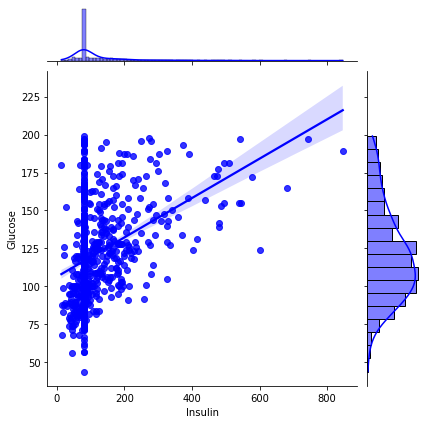

In [27]:
sns.jointplot(x='Insulin',y='Glucose', data=diatse, kind = 'reg', color = 'blue')
plt.show()

With the increase in Glucose level, level of Insulin also increases

Pairplot

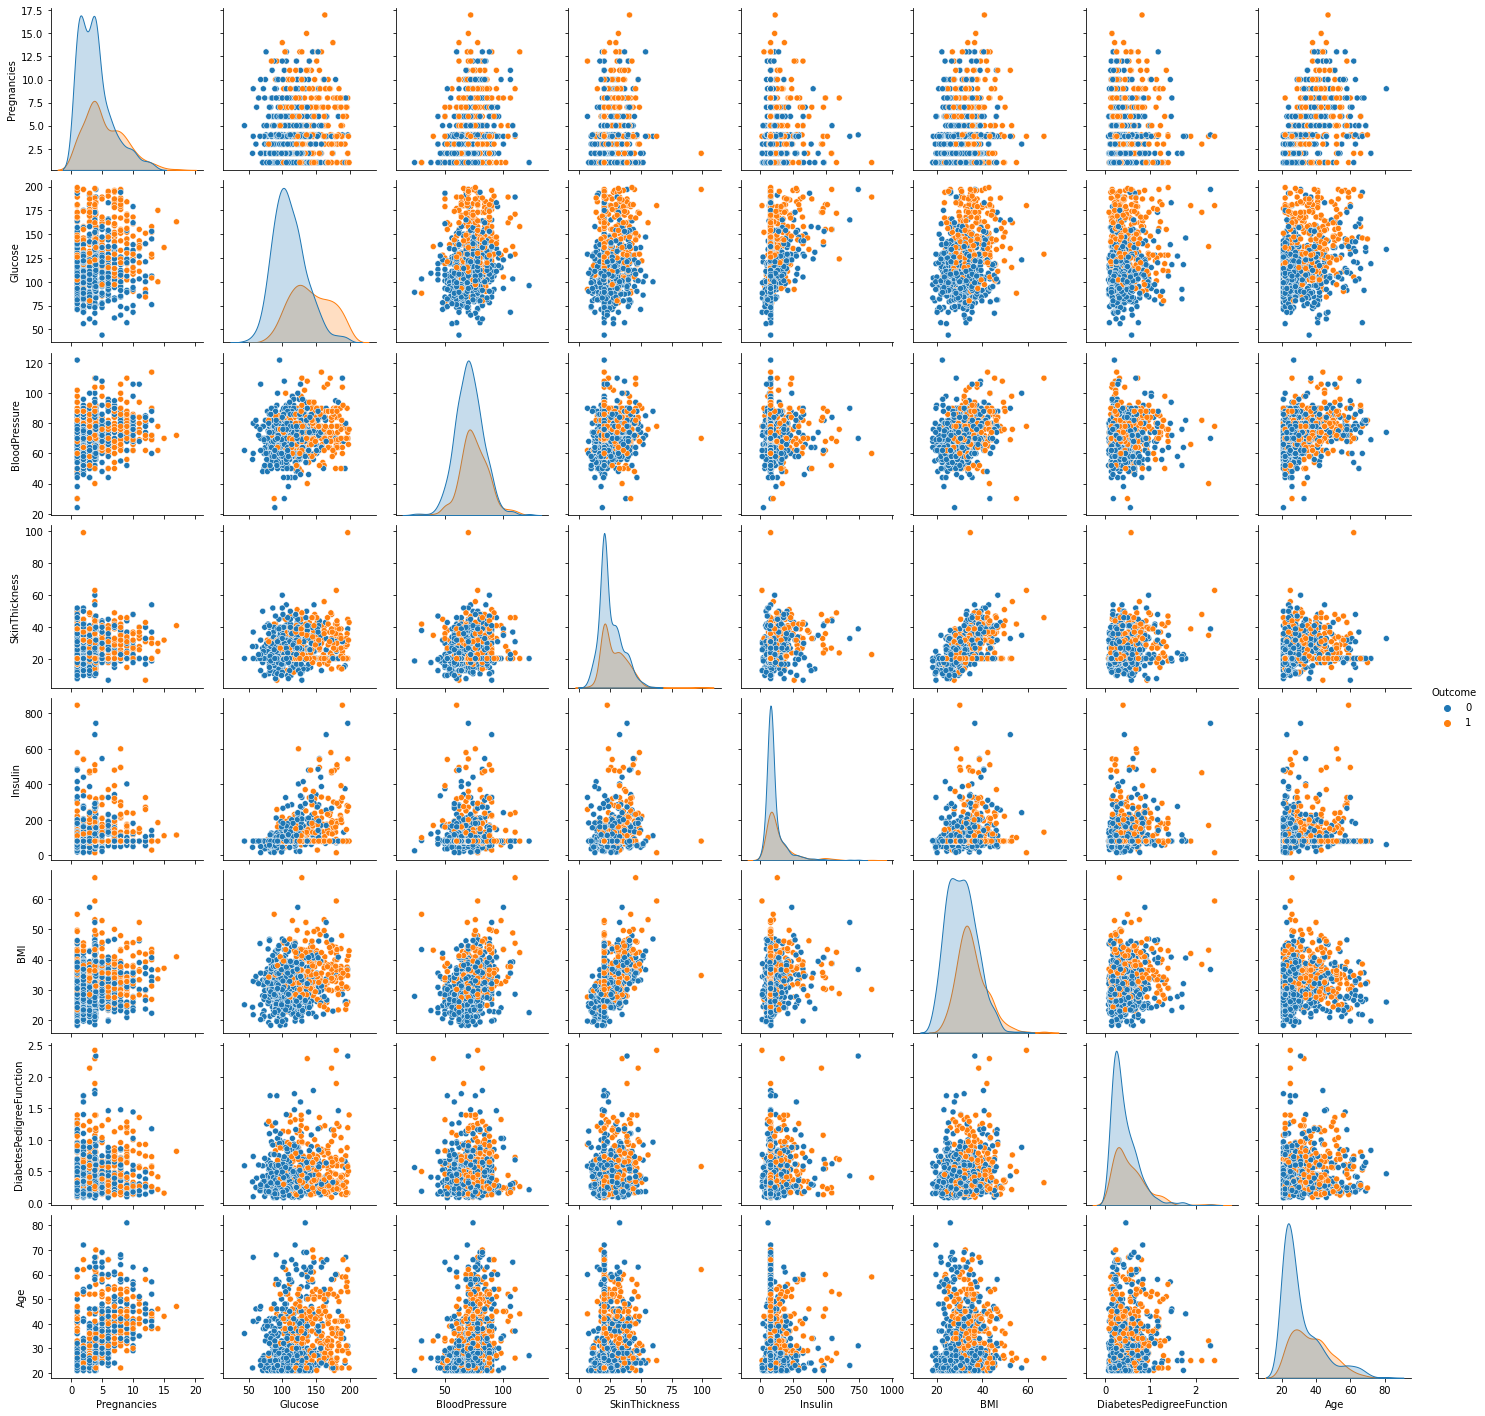

In [28]:
sns.pairplot(data=diatse,hue='Outcome')
plt.show()

Heatmap

<AxesSubplot:>

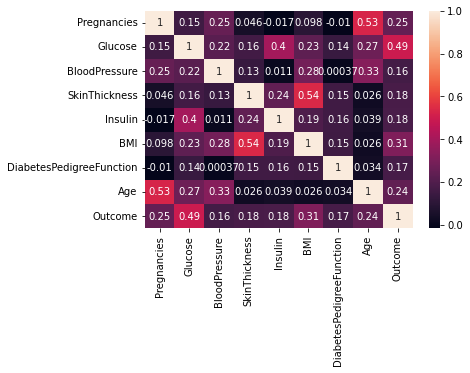

In [29]:
corr = diatse.corr()
sns.heatmap(corr, annot = True)

Pre-modeling Task

Seperating Dependant and Independant variables

In [30]:
X = diatse.drop('Outcome',axis=1).values
y = diatse['Outcome'].values

**Splitting the dataset** into training and testing data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Feature Scaling

In [32]:
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

Modeling
We will try different models in Machine learning like 
1. Logistic Regression
2. Random Forest
3. Support Vector Machine
4. Decision Tree
5. KNN


In [71]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}\n")
        
        print(f"CLASSIFICATION REPORT:\n{classifier_report}\n")
        
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        print("------------------------------------------------------------------------")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:")
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}\n")
        
        print(f"CLASSIFICATION REPORT:\n{classifier_report}\n")
        
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**Logistic Regression**

In [72]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 79.64%
F1 Score: 0.67

CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.807606    0.766467  0.796417    0.787037      0.793268
recall       0.902500    0.598131  0.796417    0.750315      0.796417
f1-score     0.852420    0.671916  0.796417    0.762168      0.789508
support    400.000000  214.000000  0.796417  614.000000    614.000000

Confusion Matrix: 
 [[361  39]
 [ 86 128]]

------------------------------------------------------------------------

Test Result:
Accuracy Score: 71.43%
F1 Score: 0.56

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.759259   0.608696  0.714286    0.683977      0.706464
recall       0.820000   0.518519  0.714286    0.669259      0.714286
f1-score     0.788462   0.560000  0.714286    0.674231      0.708352
support    100.000000  54.000000  0.714286  154.000000    154.000000

Confusion Matrix: 
 [[82 18]
 [26 

F1 score for Logistic Regression is less(0.56) where ideal score should be 1, and even there are 44 wrong predictions made in confusion matrix.  

In [73]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)


**Decision Tree**

In [74]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
F1 Score: 1.0

CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    400.0  214.0       1.0      614.0         614.0

Confusion Matrix: 
 [[400   0]
 [  0 214]]

------------------------------------------------------------------------

Test Result:
Accuracy Score: 70.78%
F1 Score: 0.57

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.766990   0.588235  0.707792    0.677613      0.704310
recall       0.790000   0.555556  0.707792    0.672778      0.707792
f1-score     0.778325   0.571429  0.707792    0.674877      0.705777
support    100.000000  54.000000  0.707792  154.000000    154.000000

Confusion Matrix: 
 [[79 21]
 [24 30]]



The accuracy of our training model is 100% but for testing model we have accuracy score of 68.3% which is due to overfiiting in our model.

In [54]:
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)

Random Forest

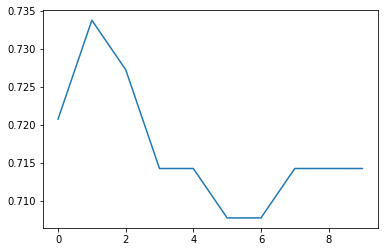

In [55]:
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
plt.plot(accuracy_scores)

In [63]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 1.0% 

F1 Score: 1.0

CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    400.0  214.0       1.0      614.0         614.0

Confusion Matrix: 
 [[400   0]
 [  0 214]]

------------------------------------------------------------------------

Test Result:
Accuracy Score: 73.38%

F1 Score: 0.62

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.792079   0.622642  0.733766    0.707360      0.732666
recall       0.800000   0.611111  0.733766    0.705556      0.733766
f1-score     0.796020   0.616822  0.733766    0.706421      0.733184
support    100.000000  54.000000  0.733766  154.000000    154.000000

Confusion Matrix: 
 [[80 20]
 [21 33]]



In [40]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

KNN

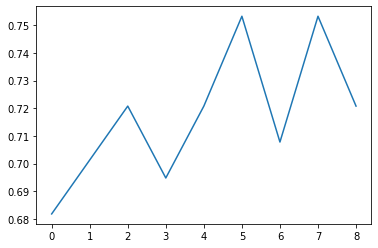

In [41]:
accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(accuracy_scores)

In [64]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 0.8127035830618893% 

F1 Score: 0.69

CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.809111    0.823529  0.812704    0.816320      0.814136
recall       0.932500    0.588785  0.812704    0.760643      0.812704
f1-score     0.866434    0.686649  0.812704    0.776541      0.803773
support    400.000000  214.000000  0.812704  614.000000    614.000000

Confusion Matrix: 
 [[373  27]
 [ 88 126]]

------------------------------------------------------------------------
Test Result:
Accuracy Score: 75.32%

F1 Score: 0.59

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.767241   0.710526  0.753247    0.738884      0.747354
recall       0.890000   0.500000  0.753247    0.695000      0.753247
f1-score     0.824074   0.586957  0.753247    0.705515      0.740929
support    100.000000  54.000000  0.753247  154.000000    154.000000

Confusion Matrix: 


In [43]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

SVM

In [44]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    400.0  214.0       1.0      614.0         614.0
_______________________________________________
Confusion Matrix: 
 [[400   0]
 [  0 214]]


Test Result:
Accuracy Score: 73.38%
_______________________________________________
F1 Score: 0.61
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.786408   0.627451  0.733766    0.706929      0.730670
recall       0.810000   0.592593  0.733766    0.701296      0.733766
f1-score     0.798030   0.609524  0.733766    0.703777      0.73

In [45]:
train_score_svc = round(accuracy_score(y_train, svc.predict(X_train)) * 100, 2)
test_score_svc = round(accuracy_score(y_test, svc.predict(X_test)) * 100, 2)

Accuracy of all Models

In [46]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn, train_score_svc],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn, test_score_svc]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor', 'SVC'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,79.64,71.43
Decision Tree Classifier,100.00,71.43
Random Forest Classifier,100.00,73.38
K-Nearest Neighbor,81.27,75.32
SVC,83.88,72.73
